##Importing libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


##Reading the Data

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/sundeepblue/movie_rating_prediction/master/movie_metadata.csv')

# Data insights

In [5]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [ ]:
##Here we can see the minimum value is 0 for many columns

In [7]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## EDA

C:\Users\mvkum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



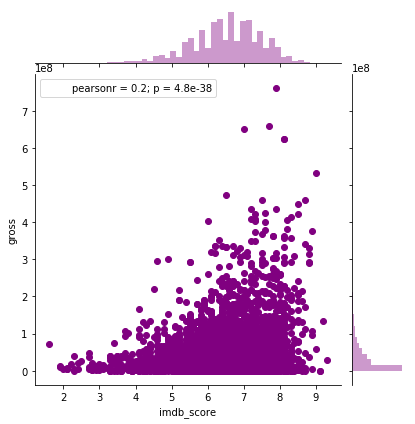

In [8]:
#Joint plot shows the pearson correlation and the trend in the data
sns.jointplot(x='imdb_score',y='gross',data=data,color='purple')

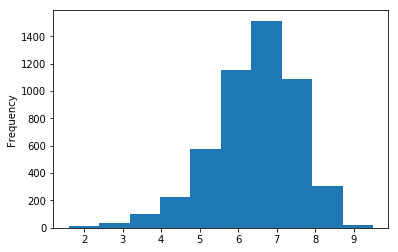

In [9]:
#Histogram shows the distribution of the data, It shows most of the ratings are in between the range 6-8
data['imdb_score'].plot.hist()

# Kernel density estimation

C:\Users\mvkum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning:

invalid value encountered in greater

C:\Users\mvkum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning:

invalid value encountered in less



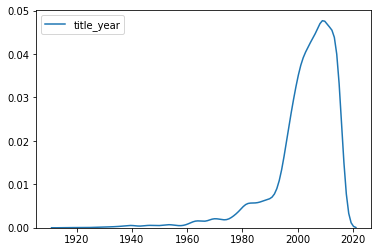

In [64]:
# KDE plot shows the distribution of movies through the years
ser = pd.Series(data['title_year'])
sns.kdeplot(ser)

# Correlation Plot

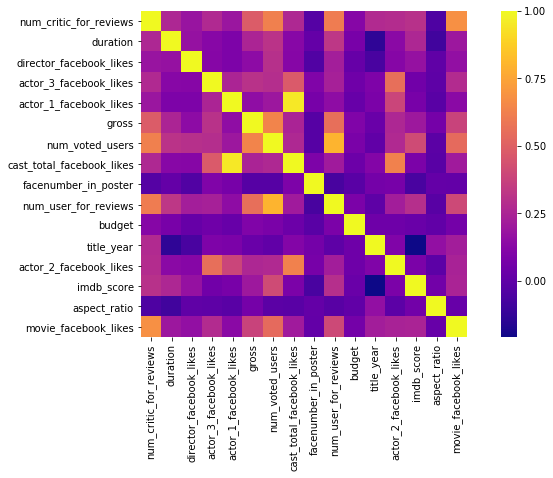

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), vmax=1, square=True, cmap='plasma')

# Data Manipulation and Cleaning

In [12]:
## Color can be a numerical feature as its binary
from sklearn.preprocessing import LabelEncoder
num=LabelEncoder()
data['colorclass']=num.fit_transform(data['color'].astype(str))

In [13]:
#saving the original file
df=pd.DataFrame(data)

In [58]:
## Manipulating the missing data with the help of mean
df=df.fillna(df.mean())

In [60]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,5043.0,1.401943e+02,1.209972e+02,1.00,50.00,1.110000e+02,194.00,8.130000e+02
duration,5043.0,1.072011e+02,2.515993e+01,7.00,93.00,1.030000e+02,118.00,5.110000e+02
director_facebook_likes,5043.0,6.865092e+02,2.784163e+03,0.00,7.00,5.200000e+01,218.00,2.300000e+04
actor_3_facebook_likes,5043.0,6.450098e+02,1.661240e+03,0.00,134.50,3.740000e+02,638.00,2.300000e+04
actor_1_facebook_likes,5043.0,6.560047e+03,1.501033e+04,0.00,615.50,9.890000e+02,11000.00,6.400000e+05
gross,5043.0,4.846841e+07,6.216318e+07,162.00,8460992.50,3.743230e+07,51357065.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,3.435900e+04,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3.090000e+03,13756.50,6.567300e+05
facenumber_in_poster,5043.0,1.371173e+00,2.010978e+00,0.00,0.00,1.000000e+00,2.00,4.300000e+01
num_user_for_reviews,5043.0,2.727708e+02,3.771949e+02,1.00,65.00,1.570000e+02,324.00,5.060000e+03


In [33]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster           0
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews           0
language                      12
country                        5
content_rating               303
budget                         0
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
colorclass                     0
dtype: int64

In [15]:
## Feature selection ( no stepwise selection or backward elimination 
##was done only the numerical value are taken)
features = ['actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'aspect_ratio',
       'movie_facebook_likes','colorclass']
target = ['imdb_score']

In [42]:

X_train=df[features]
y_val=df[target]

In [43]:
y_val.shape

(5043, 1)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_train,y_val,test_size=0.3,random_state=101)

## Importing library for linear regression

In [46]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
from sklearn import metrics 
lm.fit (X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
score_train = lm.score(X_test, y_test)
score_test = lm.score(X_train, y_train)

# Accuracy

In [50]:
print("Training score: ",score_train)
print("Testing score: ",score_test)

Training score:  0.235645097826
Testing score:  0.260789875458


## Evaluation metric RMSE

In [52]:
from sklearn.metrics import mean_squared_error

In [54]:
y_pred=lm.predict(X_test)

In [56]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.0057183404559984

In [ ]:
## Other models such as KNN and support vector machine 
##was run but the accuracy was not increasing

# TensorFlow

In [92]:
X_train=df[features]
y_val=df[target]

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_train,y_val,test_size=0.3,random_state=101)

In [95]:
##Importing library for Data Scaling(Normalization)
from sklearn.preprocessing import MinMaxScaler

In [96]:
scaler = MinMaxScaler()

In [97]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [98]:
X_train = pd.DataFrame(data=scaler.transform(X_train),columns = X_train.columns,index=X_train.index)

In [99]:
X_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)

In [ ]:
#importing tensorflow libraries

In [100]:
import tensorflow as tf

In [101]:
X_train.columns

Index(['actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes',
       'colorclass'],
      dtype='object')

In [73]:
##Defining the features as numeric, categorical or string in this case only numerical

In [102]:
actor_3_facebook_likes = tf.feature_column.numeric_column('actor_3_facebook_likes')
actor_1_facebook_likes = tf.feature_column.numeric_column('actor_1_facebook_likes')
gross = tf.feature_column.numeric_column('gross')
cast_total_facebook_likes= tf.feature_column.numeric_column('cast_total_facebook_likes')
facenumber_in_poster = tf.feature_column.numeric_column('facenumber_in_poster')
num_user_for_reviews = tf.feature_column.numeric_column('num_user_for_reviews')
title_year = tf.feature_column.numeric_column('title_year')
actor_2_facebook_likes = tf.feature_column.numeric_column('actor_2_facebook_likes')
aspect_ratio = tf.feature_column.numeric_column('aspect_ratio')
movie_facebook_likes = tf.feature_column.numeric_column('movie_facebook_likes')
colorclass = tf.feature_column.numeric_column('colorclass')
num_voted_users = tf.feature_column.numeric_column('num_voted_users')
budget=tf.feature_column.numeric_column('budget')

In [103]:
feat_cols=[actor_3_facebook_likes, actor_1_facebook_likes, gross,num_voted_users, cast_total_facebook_likes, facenumber_in_poster,
       num_user_for_reviews, budget, title_year,actor_2_facebook_likes, aspect_ratio, movie_facebook_likes,
       colorclass]


In [ ]:
# Defining the model

In [104]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train ,batch_size=10,num_epochs=1000,
                                            shuffle=True)

In [ ]:
# Fitting the defined model tried linear regressor and dense regressor but linear has better 

In [129]:
model = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\mvkum\\AppData\\Local\\Temp\\tmpni41xa53', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000026A8847B358>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [130]:
model.train(input_fn=input_func,steps=50000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\mvkum\AppData\Local\Temp\tmpni41xa53\model.ckpt.
INFO:tensorflow:loss = 405.83, step = 1
INFO:tensorflow:global_step/sec: 302.916
INFO:tensorflow:loss = 20.8635, step = 101 (0.335 sec)
INFO:tensorflow:global_step/sec: 399.472
INFO:tensorflow:loss = 40.3285, step = 201 (0.249 sec)
INFO:tensorflow:global_step/sec: 356.823
INFO:tensorflow:loss = 21.7997, step = 301 (0.281 sec)
INFO:tensorflow:global_step/sec: 407.591
INFO:tensorflow:loss = 5.54156, step = 401 (0.246 sec)
INFO:tensorflow:global_step/sec: 407.59
INFO:tensorflow:loss = 2.4922, step = 501 (0.244 sec)
INFO:tensorflow:global_step/sec: 472.961
INFO:tensorflow:loss = 9.68043, step = 601 (0.213 sec)
INFO:tensorflow:global_step/sec: 351.816
INFO

INFO:tensorflow:global_step/sec: 459.94
INFO:tensorflow:loss = 4.65764, step = 8201 (0.220 sec)
INFO:tensorflow:global_step/sec: 455.762
INFO:tensorflow:loss = 10.9775, step = 8301 (0.217 sec)
INFO:tensorflow:global_step/sec: 449.625
INFO:tensorflow:loss = 12.3762, step = 8401 (0.226 sec)
INFO:tensorflow:global_step/sec: 484.386
INFO:tensorflow:loss = 10.5945, step = 8501 (0.200 sec)
INFO:tensorflow:global_step/sec: 472.961
INFO:tensorflow:loss = 3.17881, step = 8601 (0.214 sec)
INFO:tensorflow:global_step/sec: 486.733
INFO:tensorflow:loss = 16.898, step = 8701 (0.205 sec)
INFO:tensorflow:global_step/sec: 489.109
INFO:tensorflow:loss = 5.47789, step = 8801 (0.203 sec)
INFO:tensorflow:global_step/sec: 470.743
INFO:tensorflow:loss = 10.3577, step = 8901 (0.214 sec)
INFO:tensorflow:global_step/sec: 503.856
INFO:tensorflow:loss = 1.75691, step = 9001 (0.195 sec)
INFO:tensorflow:global_step/sec: 493.926
INFO:tensorflow:loss = 17.363, step = 9101 (0.204 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 451.651
INFO:tensorflow:loss = 10.8749, step = 16601 (0.219 sec)
INFO:tensorflow:global_step/sec: 464.204
INFO:tensorflow:loss = 9.65249, step = 16701 (0.217 sec)
INFO:tensorflow:global_step/sec: 443.661
INFO:tensorflow:loss = 12.1135, step = 16801 (0.225 sec)
INFO:tensorflow:global_step/sec: 464.202
INFO:tensorflow:loss = 11.668, step = 16901 (0.212 sec)
INFO:tensorflow:global_step/sec: 475.197
INFO:tensorflow:loss = 17.8641, step = 17001 (0.215 sec)
INFO:tensorflow:global_step/sec: 489.112
INFO:tensorflow:loss = 5.87482, step = 17101 (0.202 sec)
INFO:tensorflow:global_step/sec: 477.464
INFO:tensorflow:loss = 14.2589, step = 17201 (0.207 sec)
INFO:tensorflow:global_step/sec: 457.843
INFO:tensorflow:loss = 6.92436, step = 17301 (0.219 sec)
INFO:tensorflow:global_step/sec: 477.386
INFO:tensorflow:loss = 12.0859, step = 17401 (0.209 sec)
INFO:tensorflow:global_step/sec: 479.827
INFO:tensorflow:loss = 10.5781, step = 17501 (0.208 sec)
INFO:tensorflow:globa

INFO:tensorflow:global_step/sec: 445.626
INFO:tensorflow:loss = 2.96951, step = 25001 (0.222 sec)
INFO:tensorflow:global_step/sec: 508.984
INFO:tensorflow:loss = 5.3841, step = 25101 (0.199 sec)
INFO:tensorflow:global_step/sec: 514.817
INFO:tensorflow:loss = 3.80037, step = 25201 (0.193 sec)
INFO:tensorflow:global_step/sec: 472.956
INFO:tensorflow:loss = 9.8487, step = 25301 (0.212 sec)
INFO:tensorflow:global_step/sec: 508.974
INFO:tensorflow:loss = 6.88184, step = 25401 (0.198 sec)
INFO:tensorflow:global_step/sec: 477.464
INFO:tensorflow:loss = 15.7326, step = 25501 (0.206 sec)
INFO:tensorflow:global_step/sec: 498.844
INFO:tensorflow:loss = 2.39934, step = 25601 (0.205 sec)
INFO:tensorflow:global_step/sec: 475.199
INFO:tensorflow:loss = 17.1448, step = 25701 (0.208 sec)
INFO:tensorflow:global_step/sec: 482.056
INFO:tensorflow:loss = 5.60915, step = 25801 (0.208 sec)
INFO:tensorflow:global_step/sec: 477.462
INFO:tensorflow:loss = 10.536, step = 25901 (0.212 sec)
INFO:tensorflow:global_

INFO:tensorflow:global_step/sec: 462.063
INFO:tensorflow:loss = 8.67295, step = 33401 (0.209 sec)
INFO:tensorflow:global_step/sec: 484.38
INFO:tensorflow:loss = 19.9866, step = 33501 (0.209 sec)
INFO:tensorflow:global_step/sec: 475.147
INFO:tensorflow:loss = 5.2422, step = 33601 (0.207 sec)
INFO:tensorflow:global_step/sec: 443.71
INFO:tensorflow:loss = 9.27797, step = 33701 (0.226 sec)
INFO:tensorflow:global_step/sec: 485.966
INFO:tensorflow:loss = 6.37029, step = 33801 (0.207 sec)
INFO:tensorflow:global_step/sec: 491.503
INFO:tensorflow:loss = 9.57166, step = 33901 (0.203 sec)
INFO:tensorflow:global_step/sec: 482.056
INFO:tensorflow:loss = 4.42028, step = 34001 (0.207 sec)
INFO:tensorflow:global_step/sec: 503.854
INFO:tensorflow:loss = 15.1828, step = 34101 (0.197 sec)
INFO:tensorflow:global_step/sec: 466.359
INFO:tensorflow:loss = 3.16347, step = 34201 (0.216 sec)
INFO:tensorflow:global_step/sec: 472.962
INFO:tensorflow:loss = 6.30999, step = 34301 (0.209 sec)
INFO:tensorflow:global_

INFO:tensorflow:global_step/sec: 457.843
INFO:tensorflow:loss = 13.5633, step = 41801 (0.218 sec)
INFO:tensorflow:global_step/sec: 468.553
INFO:tensorflow:loss = 32.343, step = 41901 (0.212 sec)
INFO:tensorflow:global_step/sec: 466.419
INFO:tensorflow:loss = 6.48831, step = 42001 (0.212 sec)
INFO:tensorflow:global_step/sec: 462.063
INFO:tensorflow:loss = 17.8338, step = 42101 (0.216 sec)
INFO:tensorflow:global_step/sec: 484.383
INFO:tensorflow:loss = 10.8488, step = 42201 (0.209 sec)
INFO:tensorflow:global_step/sec: 439.702
INFO:tensorflow:loss = 2.87188, step = 42301 (0.223 sec)
INFO:tensorflow:global_step/sec: 470.818
INFO:tensorflow:loss = 21.33, step = 42401 (0.213 sec)
INFO:tensorflow:global_step/sec: 491.506
INFO:tensorflow:loss = 23.8019, step = 42501 (0.206 sec)
INFO:tensorflow:global_step/sec: 477.39
INFO:tensorflow:loss = 31.3439, step = 42601 (0.207 sec)
INFO:tensorflow:global_step/sec: 479.818
INFO:tensorflow:loss = 3.41778, step = 42701 (0.208 sec)
INFO:tensorflow:global_s

In [131]:
predict_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [132]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['predictions'])

In [133]:
pred_gen = model.predict(predict_input_func)

In [134]:
predictions = list(pred_gen)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\mvkum\AppData\Local\Temp\tmpni41xa53\model.ckpt-50000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [146]:
np.sqrt(mean_squared_error(y_test,final_preds))

1.0052226975475513

In [162]:
df.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,colorclass
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1


In [154]:
from sklearn.preprocessing import StandardScaler

In [155]:
scaler = StandardScaler()
scaler.fit(dat)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [156]:
scaled_data = scaler.transform(dat)

In [157]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)




In [158]:
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [159]:
scaled_data.shape
x_pca.shape

(5043, 2)

Text(0,0.5,'Second Principal Component')

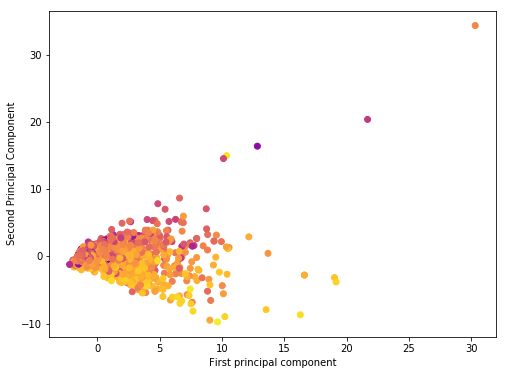

In [163]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['imdb_score'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')


In [164]:
pca.components_

array([[ 0.33389234,  0.31924882,  0.34085722,  0.39349291,  0.39448817,
         0.03124957,  0.34997769,  0.06558979,  0.08849609,  0.35559057,
        -0.00291447,  0.31169967,  0.02739594],
       [ 0.150599  ,  0.43445767, -0.31102615, -0.38625109,  0.43676038,
         0.1823179 , -0.40160401, -0.07036624,  0.13071226,  0.2611338 ,
         0.00873122, -0.22938104,  0.12014249]])